### Определение перспективного тарифа для телеком компании

###### Данное исследование разделим на несколько частей.

##### Часть 1. Изучение общей информации:
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)
* [2. Нахождение и ликвидация пропусков.](#2-bullet)

##### Часть 2. Подготовка данных:
* [1. Приведение данных к нужным типам.](#3-bullet)
* [2. Нахождение и исправление аномалий и ошибок.](#4-bullet)
* [3. Расчет количества сделанных звонков и израсходованных минут разговора по месяцам.](#5-bullet)
* [4. Расчет количества отправленных сообщений по месяцам.](#6-bullet)
* [5. Расчет объема израсходованного интернет-трафика по месяцам.](#7-bullet)
* [6. Расчет помесячной выручки с каждого пользователя.](#8-bullet)

##### Часть 3. Анализ данных:
* [1. Описание поведения клиентов оператора, исходя из выборки.](#9-bullet)

##### Часть 4. Проверка гипотез:
* [1. Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.](#10-bullet)
* [2. Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.](#11-bullet)

##### Часть 5. Общий вывод:
* [1. Общий вывод.](#12-bullet)

#### Описание тарифов:

#### Тариф «Смарт»:

- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

#### Тариф «Ультра»:

- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

#### Описание данных

#### Таблица calls (информация о звонках):

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

#### Таблица internet (информация об интернет-сессиях):

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

#### Таблица messages (информация о сообщениях):

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

#### Таблица tariffs (информация о тарифах):

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

#### Таблица users (информация о пользователях):

- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

##### Часть 1. Изучение общей информации:

###### 1-bullet

1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.

In [1]:
# загружаем все необходимые для данного исследования библиотеки
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from math import factorial
from scipy.stats import norm
from scipy import stats as st
import warnings
# открываем файлы формата csv и сохраняем их в переменных
calls_data = pd.read_csv('/datasets/calls.csv') 
internet_data = pd.read_csv('/datasets/internet.csv')
messages_data = pd.read_csv('/datasets/messages.csv')
tarifs_data = pd.read_csv('/datasets/tariffs.csv')
users_data = pd.read_csv('/datasets/users.csv')

# выводим на экран общую информацю о таблицах
display(calls_data.info(), internet_data.info(), messages_data.info(), tarifs_data.info(), users_data.info()) 

# выводим на экран первые пять строк каждой таблицы, для зрительного ознакомления
display(calls_data.head(), internet_data.head(), messages_data.head(), tarifs_data.head(), users_data.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
Rang

None

None

None

None

None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


#### Вывод

Все таблицы разные.

- calls_data имеет 4 колонки, разные типы данных, 202607 строк, пропусков нет.
- internet_data имеет 5 колонок, разные типы данных, 149396 строк, пропусков тоже нет.
- messages_data имеет 3 колонки, разные типы данных, 123035 строк, пропусков нет.
- tarifs_data имеет 8 колонок, один тип данных (кроме наименования), всего 2 строки, пропусков также нет.
- users_data имеет 8 колонок, 2 типа данных, всего 500 строк, при этом одна колонка имеет пропуски.

При этом все таблицы (кроме tarifs_data) имеют общий столбец - user_id.


##### Часть 1. Изучение общей информации:

###### 2-bullet

2. Нахождение и ликвидация пропусков.

In [2]:
# заполним пустующие значения столбца churn_date 1 января 2019 года, чтобы потом вычитать из этой даты и проверим пропуски
x = pd.datetime(2019, 1, 1)
users_data['churn_date'] = users_data['churn_date'].fillna(x)
display(users_data.isna().sum())

user_id       0
age           0
churn_date    0
city          0
first_name    0
last_name     0
reg_date      0
tariff        0
dtype: int64

#### Вывод

Пустующие значения в стоблце 'churn_date' таблицы users_data означают, что клиент продолжает пользоваться тарифом. С тем, чтобы впоследующем рассчитать количество месяцев пользования тарифом, заполним пустующие значения '1 января 2019 года'. Для этого этому значению зададим формат времени, а затем заполним пропуски и проверим.

##### Часть 2. Подготовка данных:



###### 3-bullet

1. Приведение данных к нужным типам.

In [3]:
# приведем дату и время во всех таблицах к общему формату, воспользовавшись методом to_datetime()   
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%dT%H:%M:%S')
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%dT%H:%M:%S')
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%dT%H:%M:%S')
users_data['churn_date'] = pd.to_datetime(users_data['churn_date'], format='%Y-%m-%dT%H:%M:%S')
users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y-%m-%dT%H:%M:%S')

#добавим столбец значения месяца в таблицы, где необходимо будет производить помесячные расчеты, воспользовавшись методом DatetimeIndex().month
calls_data['month'] = pd.DatetimeIndex(calls_data['call_date']).month 
internet_data['month'] = pd.DatetimeIndex(internet_data['session_date']).month
messages_data['month'] = pd.DatetimeIndex(messages_data['message_date']).month

#### Вывод

Во всех таблицах, где есть даты, столбцы с датой приведем к общему формату при помощи метода to_datetime(), а также для последующей группировки в таблицах calls_data, internet_data и messages_data создадим столбец со значениями даты разговора, использования интернета или отправки сообщения, округленного до месяца. Так будет потом находить помесячные значения.

##### Часть 2. Подготовка данных:

###### 4-bullet

2. Нахождение и исправление аномалий и ошибок.

In [4]:
# округлим значения времени разговоров в таблице calls_data до целых значений в большую сторону
# объявим функцию, которая в зависимости от значения длительности разговоров будет округлять в большую сторону
# при этом нули трогать не будем
def calc_round_duration(duration):
    if duration > 0:
        return math.ceil(duration)
    else:
        return duration
    
# применим функцию к столбцу duration и выведем на экран    
calls_data['duration'] = calls_data['duration'].apply(calc_round_duration) 
display(calls_data.head())

# добавим в таблицу internet_data столбец со значениями использованного трафика в гигабайтах
internet_data['gb_used'] = internet_data['mb_used'] / 1024

# округлим значения количества гигабайт до целых значений в большую сторону
# объявим функцию, которая в зависимости от значения количества гигабайт будет округлять в большую сторону
# при этом нули трогать не будем
def calc_round_gb(gb_used):
    if gb_used > 0:
        return math.ceil(gb_used)
    else:
        return gb_used
    
# применим функцию к столбцу gb_used и выведем на экран      
internet_data['gb_used'] = internet_data['gb_used'].apply(calc_round_gb) 
display(internet_data.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


,Unnamed: 0,id,mb_used,session_date,user_id,month,gb_used
0,0,1000_0,112.95,2018-11-25,1000,11,1.0
1,1,1000_1,1052.81,2018-09-07,1000,9,2.0
2,2,1000_2,1197.26,2018-06-25,1000,6,2.0
3,3,1000_3,550.27,2018-08-22,1000,8,1.0
4,4,1000_4,302.56,2018-09-24,1000,9,1.0


#### Вывод

Округлим значения времени разговоров в таблице calls_data до целых значений в большую сторону. Для этого объявим функцию, которая в зависимости от значения длительности разговоров будет округлять в большую сторону при этом нули трогать не будем.
Для округления в большую сторону используем метод ceil() из библиотеки math. Применим функцию к столбцу duration и выведем на экран.

Далее добавим в таблицу internet_data столбец со значениями использованного трафика в гигабайтах. Для этого значения столбца mb_used нужно поделить на 1024.

Затем аналогично с значениями разговоров округлим значения количества гигабайт до целых значений в большую сторону. Для этого  объявим функцию, которая в зависимости от значения количества гигабайт будет округлять в большую сторону, при этом нули трогать не будем. Применим функцию к столбцу gb_used и выведем на экран.      

##### Часть 2. Подготовка данных:

##### 5-bullet

3. Расчет количества сделанных звонков и израсходованных минут разговора по месяцам.

In [5]:
# создадим сводную таблицу, где в качестве индексов будут user_id, колонками будут месяца, а значениями будет количество звонков 
calls_count_data = calls_data.pivot_table(index='user_id', columns='month', values='id', aggfunc ='count')
calls_count_data = calls_count_data.fillna(0)
display(calls_count_data.head())

# создадим сводную таблицу, где будут только значения суммы разговоров по месяцам, заполним пропуски нулями и выведем на экран
duration_data_month = calls_data.pivot_table(index='user_id', columns = 'month', values='duration', aggfunc ='sum')
duration_data_month = duration_data_month.fillna(0)
display(duration_data_month.head())

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,63.0
1002,0.0,0.0,0.0,0.0,0.0,15.0,26.0,42.0,36.0,33.0,32.0,33.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,134.0,108.0,115.0,108.0
1004,0.0,0.0,0.0,0.0,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,430.0,414.0
1002,0.0,0.0,0.0,0.0,0.0,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380.0,961.0,855.0,824.0,802.0
1004,0.0,0.0,0.0,0.0,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0


#### Вывод

Создадим сводную таблицу количества помесячных звонков каждого абонента. Для этого в качестве индекса используем user_id, колонками будут месяца, значениями - id, и применим к значениям функцию count. Пустые значения заполним нулями для последующих расчетов.

Аналогично создадим сводную таблицу суммы разговоров каждого абонента, только в качестве значений используем durations, а функцией к значениям будет sum(). Пустующие значения также заполним нулями.

##### Часть 2. Подготовка данных:

###### 6-bullet

4. Расчет количества отправленных сообщений по месяцам.

In [6]:
# создадим сводную таблицу, где в качестве индексов будут user_id, колонками - месяца, а значениями будет количество отправленных сообщений
messages_data_by_month = messages_data.pivot_table(index='user_id', columns = 'month', values='id', aggfunc = 'count' )

# заполним пустующие значения нулями и выведем таблицу на экран
messages_data_by_month = messages_data_by_month.fillna(0)
display(messages_data_by_month.head())

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,0.0,0.0,0.0,0.0,0.0,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,91.0,83.0,94.0,75.0
1004,0.0,0.0,0.0,0.0,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0


#### Вывод

Создадим сводную таблицу помесячное количество сообщений  каждого абонента. Для этого в качестве индекса используем user_id, колонками будут месяца, значениями - id, и применим к значениям функцию count. Пустые значения заполним нулями для последующих расчетов.

##### Часть 2. Подготовка данных:

###### 7-bullet

5. Расчет объема израсходованного интернет-трафика по месяцам.

In [7]:
# создадим сводную таблицу, где в качестве индексов будут user_id, колонками будут месяца, а значениями будет сумма интернет-трафика в гигабайтах
internet_data_by_month = internet_data.pivot_table(index = 'user_id', columns = 'month', values = 'gb_used', aggfunc = 'sum' )
# пустые значения заполним нулями и выведем таблицу на экран
internet_data_by_month = internet_data_by_month.fillna(0)
display(internet_data_by_month.head(5))

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,4.0,49.0,28.0,27.0,26.0,28.0,27.0,19.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,35.0
1002,0.0,0.0,0.0,0.0,0.0,27.0,45.0,50.0,44.0,36.0,45.0,52.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,23.0,28.0,20.0,21.0
1004,0.0,0.0,0.0,0.0,26.0,35.0,36.0,53.0,32.0,37.0,34.0,38.0


#### Вывод

Создадим сводную таблицу объема ежемесячного интернет-трафика каждого абонента. Для этого в качестве индекса используем user_id, колонками будут месяца, в качестве значений используем gb_used, а функцией к значениям будет sum(). Пустующие значения также заполним нулями.

##### Часть 2. Подготовка данных:

###### 8-bullet

6. Расчет помесячной выручки с каждого пользователя.

In [8]:
# объединим таблицы по столбцу user_id методом join(), создавая промежуточные таблицы(объединяем по две)
f1_data = duration_data_month.join(internet_data_by_month, lsuffix='_duration', rsuffix='_internet', on='user_id')
f2_data = users_data.join(messages_data_by_month, rsuffix='_messages', on='user_id')
finish_data = f2_data.join(f1_data, on='user_id')

# заполним образовавшиеся пустые значения нулями 
finish_data = finish_data.fillna(0)

#### Вывод

После помесячных расчетов у нас образовались таблицы с одинаковым числом строк и общим столбцом user_id. Теперь объединим их. Будем делать это попарно, т.е. сначала соединим по две таблицы, а потом образовавшиеся соединим. Для объединения таблиц воспользуемся методом join(). 

Объединим таблицы duration_data_month и internet_data_by_month по столбцу user_id, обозначив приставки к соединенным таблицам.
Аналогично объединим таблицы users_data и messages_data_by_month.

Далее обединим полученные таблицы в одну и сохраним в переменной finish_data. Теперь в этой таблице содержатся все данные по звонкам, интернету и сообщениям на каждого пользователя помесячно.

Пустые значения заполним нулями.

In [9]:
# отключаем предупреждения
warnings.simplefilter(action='ignore', category=FutureWarning)
# создадим новый столбец, в котором рассчитаем количество времени, которое пользователь использует тариф, путем 
# вычитания даты закрытия тарифа и даты регистрации, округлив все это до месяцев
finish_data['months_us_tarif'] = pd.DatetimeIndex(finish_data['churn_date'] - finish_data['reg_date']).month

# объявим функцию, которая будет возвращать итоговую выручку по абонентской плате с каждого пользователя с учетом его тарифа
# и количества месяцев использования тарифа
def abon_income(row):
    if row['tariff'] == 'smart':
        return row['months_us_tarif'] * 550
    if row['tariff'] == 'ultra':
        return row['months_us_tarif'] * 1950
    return

# создадим новый столбец, в котором будет итоговая сумма абонентской платы
finish_data['abon_income'] = finish_data.apply(abon_income, axis=1) 

#### Вывод

Уберем предупреждения.

Создадим новый столбец months_us_tarif, в котором рассчитаем количество времени, которое пользователь использует тариф, путем вычитания даты закрытия тарифа и даты регистрации, округлив все это до месяцев, воспользовавшись методом DatetimeIndex

Далее рассчитаем сумму выручки по абонентской плате для каждого пользователя. Для этого объявим функцию, которая будет возвращать итоговую выручку по абонентской плате с каждого пользователя с учетом его тарифа и количества месяцев использования тарифа. Создадим новый столбец с итоговой выручкой по абонентской плате и применим функцию ко всей таблице. 

In [10]:
# создадим список всех колонок с данными по разговорам за весь год    
all_month_durations = ['1_duration', '2_duration', '3_duration', '4_duration', '5_duration', '6_duration', '7_duration', 
                       '8_duration', '9_duration', '10_duration', '11_duration', '12_duration']
    
# объявим функцию, которая будет возвращать итоговую сумму дохода в случае превышения лимита разговоров с учетом тарифа для 
# каждого пользователя за все месяцы использования тарифа
def lim_duration(row):
    total_lim_duration = 0
    for i in all_month_durations:
        if row['tariff'] == 'smart' and row[i] > 500:
            total_lim_duration += ((row[i]-500)*3)
            return total_lim_duration 
        if row['tariff'] == 'ultra'and row[i] > 3000:
            total_lim_duration += (row[i]-3000)
            return total_lim_duration  
        return 0

# добавим столбец с итоговой суммой дохода при превышении лимита по разговорам, применив ранее созданную функцию ко всей таблице 
finish_data['durations_unlim_income'] = finish_data.apply(lim_duration, axis=1)

#### Вывод

  
Теперь перейдем к расчетам сумм выручки при превышении лимитов тарифов. Для этого создадим список всех колонок с данными по разговорам за весь год. Объявим функцию, которая будет возвращать итоговую сумму дохода в случае превышения лимита разговоров с учетом тарифа для каждого пользователя за все месяцы использования тарифа. Создадим столбец с суммой выручки при превышении лимита разговоров для каждого пользователя, применив функцию ко всей таблице.

In [11]:
# создадим список всех колонок с данными по объему интернета за весь год 
all_month_internet = ['1_internet', '2_internet', '3_internet', '4_internet', '5_internet', '6_internet', '7_internet', 
                       '8_internet', '9_internet', '10_internet', '11_internet', '12_internet']

# объявим функцию, которая будет возвращать итоговую сумму дохода в случае превышения лимита объема интернета с учетом тарифа для 
# каждого пользователя за все месяцы использования тарифа
def lim_internet(row):
    total_lim_internet = 0
    for i in all_month_internet:
        if row['tariff'] == 'smart' and row[i] > 15:
            total_lim_internet += ((row[i]-15)*200)
            return total_lim_internet
        if row['tariff'] == 'ultra'and row[i] > 30:
            total_lim_internet += ((row[i]-30)*150)
            return total_lim_internet 
        return 0

# добавим столбец с итоговой суммой дохода при превышении лимита трафика по интернету, применив ранее созданную функцию ко всей таблице 
finish_data['internet_unlim_income'] = finish_data.apply(lim_internet, axis=1)

#### Вывод

Аналогично найдем суммы превышения лимитов по интернету.

In [12]:
# объявим функцию, которая будет возвращать итоговую сумму дохода в случае превышения лимита сообщений с учетом тарифа для 
# каждого пользователя за все месяцы использования тарифа
all_month_messages = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
def lim_messages(row):
    total_lim_messages = 0
    for i in all_month_messages:
        if row['tariff'] == 'smart' and row[i] > 50:
            total_lim_messages += ((row[i]-50)*3)
            return total_lim_messages 
        if row['tariff'] == 'ultra'and row[i] > 1000:
            total_lim_messages += ((row[i]-1000)*1)
            return total_lim_messages 
        return 0

# добавим столбец с итоговой суммой дохода при превышении лимита по сообщениям, п

#### Вывод

Аналогично найдем суммы превышения лимитов по сообщениям для каждого пользователя.

In [13]:
# добавим столбец с итоговой суммой дохода при превышении лимита по сообщениям, применив ранее созданную функцию ко всей таблице 
finish_data['messages_unlim_income'] = finish_data.apply(lim_messages, axis=1)

# добавим столбец с итоговой суммой дохода по абоненской плате и превышениям лимита по разговорам, интернету и сообщениям
finish_data['total_income'] = finish_data['abon_income'] + finish_data['durations_unlim_income'] + finish_data['internet_unlim_income'] + finish_data['messages_unlim_income']

# выведем на экран общую информацию о таблице и первые пять строк таблицы
display(finish_data.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,1,2,...,9_internet,10_internet,11_internet,12_internet,months_us_tarif,abon_income,durations_unlim_income,internet_unlim_income,messages_unlim_income,total_income
0,1000,52,2019-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,...,26.0,28.0,27.0,19.0,8,15600,0.0,0.0,0.0,15600.0
1,1001,41,2019-01-01,Москва,Иван,Ежов,2018-11-01,smart,0.0,0.0,...,0.0,0.0,47.0,35.0,3,1650,0.0,0.0,0.0,1650.0
2,1002,59,2019-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0.0,0.0,...,44.0,36.0,45.0,52.0,7,3850,0.0,0.0,0.0,3850.0
3,1003,23,2019-01-01,Москва,Белла,Белякова,2018-08-17,ultra,0.0,0.0,...,23.0,28.0,20.0,21.0,5,9750,0.0,0.0,0.0,9750.0
4,1004,68,2019-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,0.0,0.0,...,32.0,37.0,34.0,38.0,8,15600,0.0,0.0,0.0,15600.0


#### Вывод

Чтобы получить итоговую выручку с каждого пользователя, сложим колонки с суммой абонентской платы и суммами превышения лимитов по разговорам, интернету и сообщениям. Выведем первые пять строк таблицы на экран.


##### Часть 3. Анализ данных:

###### 9-bullet

1. Описание поведения клиентов оператора, исходя из выборки.

In [14]:
# добавим столбец, в котором будут значения средней длительности разговора в месяц, путем суммирования всех месяцев разговоров
# и деления на количество месяцев
finish_data['duration_mean'] = (finish_data['1_duration'] + finish_data['2_duration'] + finish_data['3_duration'] +
                               finish_data['4_duration'] + finish_data['5_duration'] + finish_data['6_duration'] +
                                finish_data['7_duration'] + finish_data['8_duration'] + finish_data['9_duration'] +
                                finish_data['10_duration'] + finish_data['11_duration'] + finish_data['12_duration']) / finish_data['months_us_tarif']

# добавим столбец, в котором будут значения среднего количества трафика интернета в месяц, путем суммирования всех месяцев разговоров
# и деления на количество месяцев    
finish_data['internet_mean'] = (finish_data['1_internet'] + finish_data['2_internet'] + finish_data['3_internet'] +
                               finish_data['4_internet'] + finish_data['5_internet'] + finish_data['6_internet'] +
                                finish_data['7_internet'] + finish_data['8_internet'] + finish_data['9_internet'] +
                                finish_data['10_internet'] + finish_data['11_internet'] + finish_data['12_internet']) / finish_data['months_us_tarif']        


# добавим столбец, в котором будут значения среднего количества сообщений в месяц, путем суммирования всех месяцев разговоров
# и деления на количество месяцев
finish_data['messages_mean'] = (finish_data[1] + finish_data[2] + finish_data[3] +
                               finish_data[4] + finish_data[5] + finish_data[6] +
                                finish_data[7] + finish_data[8] + finish_data[9] +
                                finish_data[10] + finish_data[11] + finish_data[12]) / finish_data['months_us_tarif'] 


# разобъем таблицу, создав две отдельные, путем получения срезов данных методом query с условием: название тарифного плана
smart_tarif_data = finish_data.query('tariff == "smart"')
ultra_tarif_data = finish_data.query('tariff == "ultra"')

#### Вывод

Рассчитали средние значения разговоров, объема интернет-трафика и сообщений для каждого абонента. Разбили итоговую таблицу на две: исходя из тарифного плана.

'Среднее по разговорам тарифа смарт: 429.87'

'Дисперсия по разговорам тарифа смарт: 103407.61'

'Стандартное отклонение по разговорам тарифа смарт: 321.57'

'Среднее по разговорам тарифа ультра: 583.00'

'Дисперсия по разговорам тарифа ультра: 712498.11'

'Стандартное отклонение по разговорам тарифа ультра: 844.10'

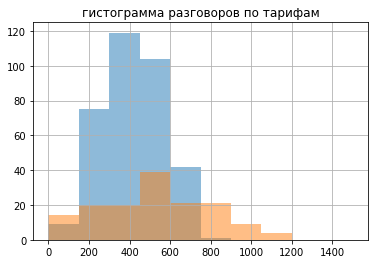

In [15]:
# займемся исследуемыми значениями разговоров для обоих тарифов
# вычислим среднее, дисперсию и стандартное отклонение для разговоров для тарифа смарт
duration_mean_smart = smart_tarif_data['duration_mean'].mean()
duration_var_smart = np.var(smart_tarif_data['duration_mean'], ddof=1) #параметр ddof=1 ввиду того, что выборка, а не вся совокупность
duration_std_smart = np.sqrt(duration_var_smart)
# выведем на экран среднее, дисперсию и стандартное отклонение для разговоров для тарифа смарт
display('Среднее по разговорам тарифа смарт: {:.2f}'.format(duration_mean_smart))                                
display('Дисперсия по разговорам тарифа смарт: {:.2f}'.format(duration_var_smart))                                
display('Стандартное отклонение по разговорам тарифа смарт: {:.2f}'.format(duration_std_smart))


# вычислим среднее, дисперсию и стандартное отклонение для разговоров для тарифа ультар
duration_mean_ultra = ultra_tarif_data['duration_mean'].mean()
duration_var_ultra = np.var(ultra_tarif_data['duration_mean'], ddof=1) #параметр ddof=1 ввиду того, что выборка, а не вся совокупность
duration_std_ultra = np.sqrt(duration_var_ultra)
# выведем на экран среднее, дисперсию и стандартное отклонение для разговоров для тарифа ультра
display('Среднее по разговорам тарифа ультра: {:.2f}'.format(duration_mean_ultra))                                
display('Дисперсия по разговорам тарифа ультра: {:.2f}'.format(duration_var_ultra))                                
display('Стандартное отклонение по разговорам тарифа ультра: {:.2f}'.format(duration_std_ultra))

# построим гисторграммы распеределений по разговорам для обоих тарифов на одном экране
smart_tarif_data['duration_mean'].hist(range=(0,1500), alpha=0.5) #зададим alpha=0.5, чтобы были видны пересечения
ultra_tarif_data['duration_mean'].hist(range=(0,1500), alpha=0.5) #зададим alpha=0.5, чтобы были видны пересечения
plt.title('гистограмма разговоров по тарифам')
plt.show()

#### Вывод

Исследовали поведение клиентов тарифов по разговорам 

'Среднее по интернет-трафику тарифа смарт: 42.53'

'Дисперсия по интернет-трафику тарифа смарт: 369.69'

'Стандартное отклонение по интернет-трафику тарифа смарт: 19.23'

'Среднее по интернет-трафику тарифа ультра: 39.90'

'Дисперсия по интернет-трафику тарифа ультра: 1995.25'

'Стандартное отклонение по интернет-трафику тарифа ультра: 44.67'

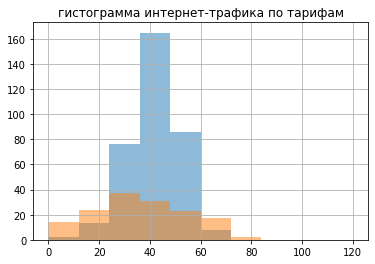

In [16]:
# займемся исследуемыми значениеми интернет-трафика для обоих тарифов
# вычислим среднее, дисперсию и стандартное отклонение для трафика для тарифа смарт
internet_mean_smart = smart_tarif_data['internet_mean'].mean()
internet_var_smart = np.var(smart_tarif_data['internet_mean'], ddof=1) #параметр ddof=1 ввиду того, что выборка, а не вся совокупность 
internet_std_smart = np.sqrt(internet_var_smart)
# выведем на экран среднее, дисперсию и стандартное отклонение для трафика для тарифа смарт
display('Среднее по интернет-трафику тарифа смарт: {:.2f}'.format(internet_mean_smart))                                
display('Дисперсия по интернет-трафику тарифа смарт: {:.2f}'.format(internet_var_smart))                                
display('Стандартное отклонение по интернет-трафику тарифа смарт: {:.2f}'.format(internet_std_smart))

# вычислим среднее, дисперсию и стандартное отклонение для трафика для тарифа ультра
internet_mean_ultra = ultra_tarif_data['internet_mean'].mean()
internet_var_ultra = np.var(ultra_tarif_data['internet_mean'], ddof=1) #параметр ddof=1 ввиду того, что выборка, а не вся совокупность 
internet_std_ultra = np.sqrt(internet_var_ultra)
# выведем на экран среднее, дисперсию и стандартное отклонение для трафика для тарифа ультра
display('Среднее по интернет-трафику тарифа ультра: {:.2f}'.format(internet_mean_ultra))                                
display('Дисперсия по интернет-трафику тарифа ультра: {:.2f}'.format(internet_var_ultra))                                
display('Стандартное отклонение по интернет-трафику тарифа ультра: {:.2f}'.format(internet_std_ultra))

# построим гисторграммы распеределений по интернет-трафику для обоих тарифов на одном экране
smart_tarif_data['internet_mean'].hist(range=(0,120), alpha=0.5) #зададим alpha=0.5, чтобы были видны пересечения
ultra_tarif_data['internet_mean'].hist(range=(0,120), alpha=0.5) #зададим alpha=0.5, чтобы были видны пересечения
plt.title('гистограмма интернет-трафика по тарифам')
plt.show()

#### Вывод

Исследовали поведение клиентов тарифов по интернет-трафику

'Среднее по сообщениям тарифа смарт: 32.64'

'Дисперсия по сообщениям тарифа смарт: 835.19'

'Стандартное отклонение по сообщениям тарифа смарт: 19.23'

'Среднее по сообщениям тарифа ультра: 32.64'

'Дисперсия по сообщениям тарифа ультра: 835.19'

'Стандартное отклонение по сообщениям тарифа ультра: 44.67'

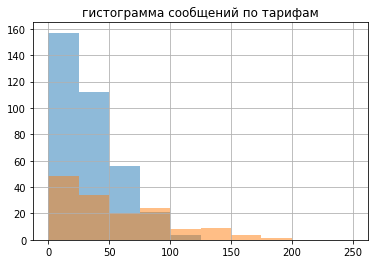

In [17]:
# займемся исследуемыми значениями сообщений для обоих тарифов
# вычислим среднее, дисперсию и стандартное отклонение для сообщений тарфиа смарт
messages_mean_smart = smart_tarif_data['messages_mean'].mean()
messages_var_smart = np.var(smart_tarif_data['messages_mean'], ddof=1) #параметр ddof=1 ввиду того, что выборка, а не вся совокупность
messages_std_smart = np.sqrt(internet_var_smart)
# выведем на экран среднее, дисперсию и стандартное отклонение для сообщений тарифа смарт
display('Среднее по сообщениям тарифа смарт: {:.2f}'.format(messages_mean_smart))                          
display('Дисперсия по сообщениям тарифа смарт: {:.2f}'.format(messages_var_smart))                                
display('Стандартное отклонение по сообщениям тарифа смарт: {:.2f}'.format(messages_std_smart))

# вычислим среднее, дисперсию и стандартное отклонение для сообщений тарфиа ультра
messages_mean_ultra = smart_tarif_data['messages_mean'].mean()
messages_var_ultra = np.var(smart_tarif_data['messages_mean'], ddof=1) #параметр ddof=1 ввиду того, что выборка, а не вся совокупность
messages_std_ultra = np.sqrt(internet_var_ultra)
# выведем на экран среднее, дисперсию и стандартное отклонение для сообщений тарифа ультра
display('Среднее по сообщениям тарифа ультра: {:.2f}'.format(messages_mean_ultra),
       'Дисперсия по сообщениям тарифа ультра: {:.2f}'.format(messages_var_ultra),
       'Стандартное отклонение по сообщениям тарифа ультра: {:.2f}'.format(messages_std_ultra))                                

# построим гисторграммы распеределений по интернет-трафику для обоих тарифов на одном экране
smart_tarif_data['messages_mean'].hist(range=(0,250), alpha=0.5) #зададим alpha=0.5, чтобы были видны пересечения
ultra_tarif_data['messages_mean'].hist(range=(0,250), alpha=0.5) #зададим alpha=0.5, чтобы были видны пересечения
plt.title('гистограмма сообщений по тарифам')
plt.show()


#### Вывод

Исследовали поведение клиентов тарифов по сообщениям

#### Вывод

- Для того, чтобы описать поведение клиентов, получим средние значения разговоров, интернет-трафика и сообщений. Сделаем это следующим образом: для разговоров - сложим все колонки разговоров(их всего 12), а затем разделим на количество месяцев использования тарифа(чтобы нули не искажали среднее, те чтобы нули не учитывались там, где абонент не пользовался тарифом вообще). Аналогично поступим для интернет-трафика и сообщений. Полученные значения сохраним в новых столбцах.

- Далее разделим таблицу исходя из тарифного плана. Обе таблицы сохраним в переменных.

- Затем исследуем следующие значения: среднее, дисперсия и стандартное отклонение для разговоров, интернет-трафика и сообщений каждого тарифного плана.

- Для каждого тарифа при исследовании значений среднего, дисперсии и стандартого отклонения воспользуемся методами mean(), var(), при этом используем параметр ddof=1, тк это выборка, а не генеральная совокупность, и метод sqrt() для извлечения квадратного корня.

- Получив сравнительные данные исследуемых значений для каждого тарифа по , построим гистограммы для каждого тарифа, но выведем на одном графике для сравнения.

- Полученные данные говорят о том, что среднее, дисперсия и стандартное отклонение по разговорам у тарифа ультра выше. Гистограммы показывают нормальное распределение и тоже свидетельствуют о том, что основаня масса пользователей тарифа смарт разговаривают 400 мин. в месяц, а основная масса пользвателей тарифа ультра 600 мин. в месяц. при этом разброс в большую и меньшую сторону у тарфиа ультра больше.

- По интернет-трафику среднее по тарифу смарт выше, чем среднее по тарифу ультра. Также значительно разнятся дисперсия и стандартное отклонение. Получается, что пользователи тарифа смарт пользуются интернетом практически одинаково и в чуть большем объеме, а среди пользователей тарифа ультра имеются те, что пользуются значительно меньше среднего и значительно больше среднего.

- По сообщениям среднее по обоим тарифам совпадает, но как и с интернет-трафиком, пользователи тарифа ультра имеют большее стандартное отклонение, те имеются такие, которые отправлют больше сообщений.

- По итогу видно, что пользователи тарифа ультра совершают больше звонков, чем пользователи тарифа смарт. Пользователи тарифа ультар неравномерно пользуются интернетом(кто-то мало, а кто-то много) и в среднем чуть меньше, чем пользователи тарифа смарт, где интернетом пользуются примерно в одних объемах, по сообщениям поведение клиентов обоих тарифов почти схоже.

##### Часть 4. Проверка гипотез:

###### 10-bullet

1. Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [18]:
# создадим выборки данных об общей выручке для каждого тарифного плана по ранее разбитым таблицам, сохранив их в переменной
sample_1 = smart_tarif_data['total_income']
sample_2 = ultra_tarif_data['total_income']

# проверим дисперсии выборок и выведем их на экран
sample_1_var = np.var(sample_1, ddof=1)
sample_2_var = np.var(sample_2, ddof=1)
display('Дисперсия по 1 выборке: {:.2f}'.format(sample_1_var))
display('Дисперсия по 2 выборке: {:.2f}'.format(sample_2_var))

# зададим критический уровень статистической значимости. если p-value окажется меньше него - отвергнем гипотезу
alpha = .05
        
# проверим гипотезу о равенстве средних двух выборок    
results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var=False)

# выведем на экран значеие p-value, задав условие, которое отвергает или нет нулевую гипотезу в зависимости от 
# критического уровеня статистической значимости
display('p-value:', results.pvalue)
if (results.pvalue < alpha):
    display('отвергаем нулевую гипотезу')
else:
    display('не получилось отвергнуть нулевую гипотезу')

'Дисперсия по 1 выборке: 5506364.33'

'Дисперсия по 2 выборке: 41650422.18'

'p-value:'

1.2400438960214695e-37

'отвергаем нулевую гипотезу'

#### Вывод

- Создадим выборки данных по общей сумме выручки по обоим тарифам(ранее уже общую таблицу разбили на таблицы исходя из тарифа) и сохраним их в переменных. Зададим общеиспользуемый уровень статистической значимости alpha = 0.05.

- Сформулируем нулевую гипотезу, что средние выручки обоих тарифов равны. Для этого используем ttest для двух выборок. Альтернативная гипотеза будет о том, что средние выручки обоих тарифов не равны.

- Поскольку p-value оказался критически низок(очень близкое к нулю значение), нулевая гипотеза о равенстве двух выборок отвергается.

- Приходим к выводу, что средние выручки обоих тарифов значительно разнятся.




##### Часть 4. Проверка гипотез:

###### 11-bullet

2. Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [19]:
# разобъем таблицу, создав две отдельные, путем получения срезов данных методом query с условием: название города Москва или не Москва
moscow_data = finish_data.query('city == "Москва"')
not_moscow_data = finish_data.query('city != "Москва"')

# создадим выборки данных об общей выручке для каждой таблицы, сохранив их в переменной
new_sample_1 = moscow_data['total_income']
new_sample_2 = not_moscow_data['total_income']

# проверим дисперсии выборок и выведем их на экран
new_sample_1_var = np.var(new_sample_1, ddof=1)
new_sample_2_var = np.var(new_sample_2, ddof=1)
display('Дисперсия по 1 выборке: {:.2f}'.format(new_sample_1_var))
display('Дисперсия по 2 выборке: {:.2f}'.format(new_sample_2_var))



# зададим критический уровень статистической значимости. если p-value окажется меньше него - отвергнем гипотезу
alpha = .05
        
# проверим гипотезу о равенстве средних двух выборок    
results = st.ttest_ind(
    new_sample_1, 
    new_sample_2,
    equal_var=False)

# выведем на экран значеие p-value, задав условие, которое отвергает или нет нулевую гипотезу в зависимости от 
# критического уровеня статистической значимости
display('p-value:', results.pvalue)
if (results.pvalue < alpha):
    display('отвергаем нулевую гипотезу')
else:
    display('не получилось отвергнуть нулевую гипотезу')    

'Дисперсия по 1 выборке: 36917406.20'

'Дисперсия по 2 выборке: 33039852.81'

'p-value:'

0.7238577047074394

'не получилось отвергнуть нулевую гипотезу'

#### Вывод

- Разобъем итоговую таблицу по значению столбца city Москва или не Москва и сохраним их в переменных

- Создадим выборки данных по общей сумме выручки по образовавшися таблицам и сохраним их в переменных. Зададим общеиспользуемый уровень статистической значимости alpha = 0.05.

- Сформулируем нулевую гипотезу, что средние выручки клиентов из Москвы и клиентов не из Москвы равны. Для этого используем ttest для двух выборок. Альтернативная гипотеза будет о том, что средние выручки выборок не равны.

- Поскольку p-value оказался высок(72%), нулевую гипотезу о равенстве двух выборок не удалось отвергнуть.

- Приходим к выводу, что средние выручки как по Москве, так и по другим городам практически совпадают.

##### Часть 5. Общий вывод:

###### 12-bullet

1. Общий вывод.


- Представленные таблицы были не совсем пригодны для работы: пришлось заполнять пропуски(для расчета периода использования тарифом), округять время разговоров и количества использованного трафика в большую сторону в соответствии с условиями тарифных планов.

- Затем был произведен помесячный расчет количества разговоров, объема использованного интернет-трафика и количества сообщений для каждого абонента.

- Далее произведены расчеты выручки с каждого пользователя: по абонентской плате, по превышениям лимитов разговоров, использованного интернет-трафика и сообщений, а также общая выручка. 

- Проведено исследование поведения клиентов тарифов. Поведение клиентов разных тарифов различается: показатели звонков, использованного интернет-трафика и отправленных сообщений, у клиентов тарифа смарт находятся в узком диапазоне и практически не выбиваются из тарифа (кроме показателей интернет-трафика). Показатели тарифа ультра напротив, значительно разнятся: несмотря на широкие возможности тарифа, не все пользователи используют его по максимуму. 

- Клиенты тарифа ультра приносят компании больше выручки. При этом на показатели выручки почти не влияет город проживания абонента. 

- Рекомендация: скорректировать рекламный бюджет в пользу тарифа "Ультра".